## Рыбин ИУ5-63Б РК1
## Вариант 17
### Задача 3 - Набор данных 1
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему? </br>
Доп требование: для произвольной колонки данных построить график "Ящик с усами (boxplot)"

In [46]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

### Загрузка и анализ датасета

In [33]:
iris = load_iris()
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
# значения целевого признака
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Масштабирование данных
Для этого задания выбрал признак sepal lenght. Для того, чтобы признак принадлежал отрезку [0; 1] воспользовался методом MinMaxScaler, чтобы не получить отрицательные значения длины листка.

In [34]:
scaler = MinMaxScaler()

sepal_length = dataset.data[:, 0].reshape(-1, 1)
sepal_length_scaled = scaler.fit_transform(sepal_length)

print(sepal_length_scaled)

[[0.22222222]
 [0.16666667]
 [0.11111111]
 [0.08333333]
 [0.19444444]
 [0.30555556]
 [0.08333333]
 [0.19444444]
 [0.02777778]
 [0.16666667]
 [0.30555556]
 [0.13888889]
 [0.13888889]
 [0.        ]
 [0.41666667]
 [0.38888889]
 [0.30555556]
 [0.22222222]
 [0.38888889]
 [0.22222222]
 [0.30555556]
 [0.22222222]
 [0.08333333]
 [0.22222222]
 [0.13888889]
 [0.19444444]
 [0.19444444]
 [0.25      ]
 [0.25      ]
 [0.11111111]
 [0.13888889]
 [0.30555556]
 [0.25      ]
 [0.33333333]
 [0.16666667]
 [0.19444444]
 [0.33333333]
 [0.16666667]
 [0.02777778]
 [0.22222222]
 [0.19444444]
 [0.05555556]
 [0.02777778]
 [0.19444444]
 [0.22222222]
 [0.13888889]
 [0.22222222]
 [0.08333333]
 [0.27777778]
 [0.19444444]
 [0.75      ]
 [0.58333333]
 [0.72222222]
 [0.33333333]
 [0.61111111]
 [0.38888889]
 [0.55555556]
 [0.16666667]
 [0.63888889]
 [0.25      ]
 [0.19444444]
 [0.44444444]
 [0.47222222]
 [0.5       ]
 [0.36111111]
 [0.66666667]
 [0.36111111]
 [0.41666667]
 [0.52777778]
 [0.36111111]
 [0.44444444]
 [0.5 

### Преобразование категориальных признаков в количественные
В моем датасете нет категориальных признаков, поэтому я их создам при преоброзовании в dataframe на основе значений целевого признака.

In [35]:
target_dict = dict(zip(np.unique(iris.target), iris.target_names))
print(target_dict)

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


In [36]:
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']
iris_df['target_name'] = [target_dict[i] for i in iris['target']]

print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target target_name  
0

##### *Label Encoding*
Используется метод LabelEncoder. Присваивает каждому категориальному значению уникальное числовое значение, сохраняя порядок категорий.

In [37]:
le = LabelEncoder()
label_encoder = le.fit_transform(iris_df['target_name'])
print(label_encoder)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


##### *One Hot Encoding*
Используется метод OneHotEncoder. Преобразует категориальное значение в бинарный вектор, причем его длина равна количеству категорий. Как следствие. увеличивается размерность данных, но позволяет их использовать в более сложных моделях.

In [44]:
ohe = OneHotEncoder(sparse_output=False)
one_hot_encoder = ohe.fit_transform(iris_df[['target_name']])
print(one_hot_encoder)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

### Ящик с усами (boxplot)

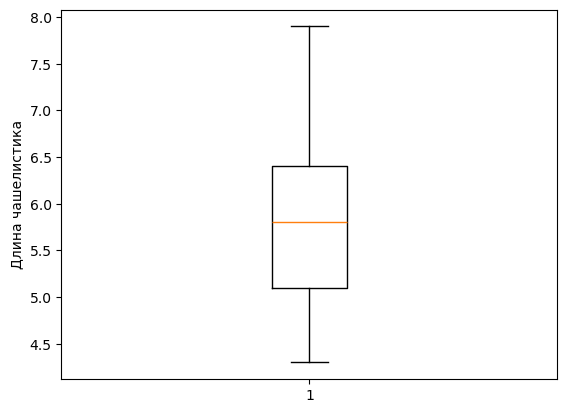

In [52]:
plt.boxplot(iris_df["sepal length (cm)"])
plt.ylabel("Длина чашелистика")
plt.show()